In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Thesis/sounds/ambulance

/content/drive/MyDrive/Colab Notebooks/Thesis/sounds/ambulance


In [3]:
!python sample.py

Processing sound_100.wav...
/content/drive/MyDrive/Colab Notebooks/Thesis/sounds/ambulance/sample.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7939: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
Spectrogram saved as ./sound_100_spectrogram.png

Processing sound_1.wav...
/content/drive/MyDrive/Colab Notebooks/Thesis/sounds/ambulance/sample.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')
Spectrogram saved as ./sound_1_spectrogram.png

Processing sound_10.wav...
Spectrogram saved as ./sound_10_spectrogram.png

Processing sound_101.wav...
Spectrogram saved as ./sound_101_spectrogram.png

Processing sound_102.wav

In [4]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Thesis/sounds/traffic

/content/drive/MyDrive/Colab Notebooks/Thesis/sounds/traffic


In [5]:
!python sample.py

Processing sound_407.wav...
/content/drive/MyDrive/Colab Notebooks/Thesis/sounds/traffic/sample.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')
Spectrogram saved as ./sound_407_spectrogram.png

Processing sound_406.wav...
/content/drive/MyDrive/Colab Notebooks/Thesis/sounds/traffic/sample.py:17: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  sound_info = pylab.fromstring(frames, 'int16')
Spectrogram saved as ./sound_406_spectrogram.png

Processing sound_402.wav...
Spectrogram saved as ./sound_402_spectrogram.png

Processing sound_401.wav...
/usr/local/lib/python3.10/dist-packages/matplotlib/axes/_axes.py:7939: RuntimeWarning: divide by zero encountered in log10
  Z = 10. * np.log10(spec)
Spectrogram saved as ./sound_401_spectrogram.png

Processing sound_412.w

In [6]:
%cd /content/drive/MyDrive/Colab\ Notebooks/Thesis

/content/drive/MyDrive/Colab Notebooks/Thesis


In [7]:
!pip install librosa resampy

#Audio Processing Libraries
import librosa
import librosa.display
from scipy import signal

#For Playing Audios
import IPython.display as ipd

#Array Processing
import numpy as np

#Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

#Display the confusion matrix
from sklearn.metrics import confusion_matrix

#Deal with .pkl files
import pickle

#Create a dataframe
import pandas as pd

#Transform and encode the categorical targets
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

#Split dataset
from sklearn.model_selection import train_test_split

import os

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 30.0 MB/s eta 0:00:00


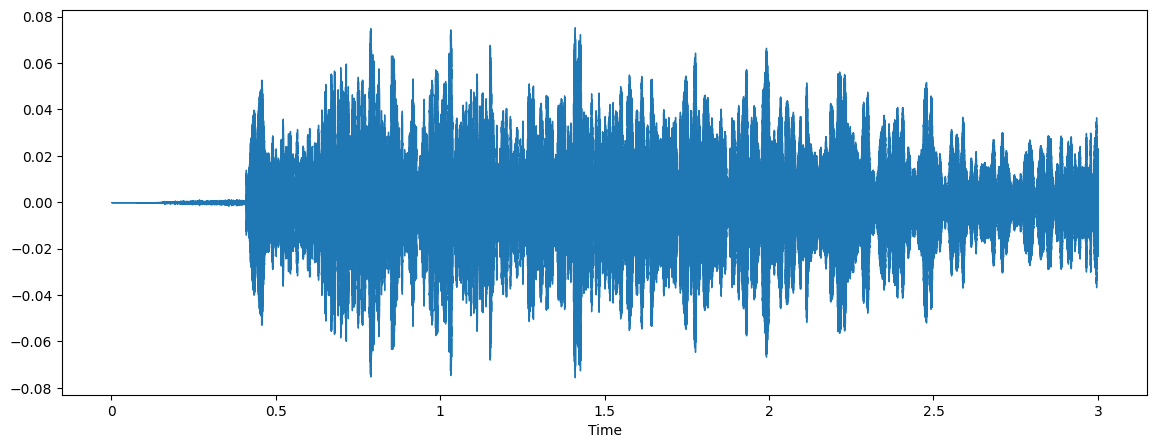

In [8]:
filename = "/content/drive/MyDrive/Colab Notebooks/Thesis/sounds/ambulance/sound_1.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

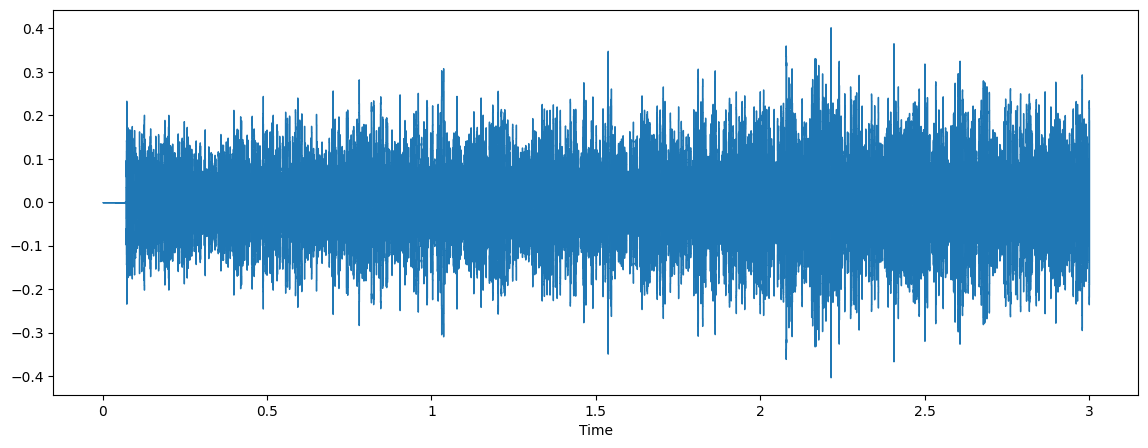

In [9]:
filename = "/content/drive/MyDrive/Colab Notebooks/Thesis/sounds/traffic/sound_401.wav"
plt.figure(figsize=(14,5))
data, sample_rate = librosa.load(filename)
librosa.display.waveshow(data, sr=sample_rate)
ipd.Audio(filename)

In [10]:
def features_extractor(file_name):
    audio, sample_rate = librosa.load(file_name, res_type='kaiser_fast')
    mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=80)
    mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)

    return mfccs_scaled_features

In [11]:
audio_dataset_path = '/content/drive/MyDrive/Colab Notebooks/Thesis/sounds/'

extracted_features = []
for path in os.listdir(audio_dataset_path):
    for file in os.listdir(audio_dataset_path+path+"/"):
        if file.lower().endswith(".wav"):
            file_name = audio_dataset_path+path+"/"+file
            data = features_extractor(file_name)
            extracted_features.append([data, path])

In [12]:
f = open('./Extracted_Features.pkl', 'wb')
pickle.dump(extracted_features, f)
f.close()

In [13]:
f = open('./Extracted_Features.pkl', 'rb')
Data = pickle.load(f)
f.close()

In [18]:
df = pd.DataFrame(Data,columns=['feature','class'])
df.head()

feature    class
0  [-168.7741, 174.17227, -37.34053, 11.716855, -...  traffic
1  [-180.77437, 181.92612, -39.61179, 9.436547, -...  traffic
2  [-175.30992, 185.72336, -26.50875, 13.811958, ...  traffic
3  [-193.0595, 191.812, -28.586767, 15.74523, 4.4...  traffic
4  [-171.66878, 192.88081, -25.05293, 17.139473, ...  traffic

In [19]:
df.tail()

feature      class
395  [-204.71997, 108.61782, -63.552223, 12.127432,...  ambulance
396  [-246.27025, 124.50852, -52.056423, -0.5638988...  ambulance
397  [-470.85968, 165.94934, -38.357567, 11.948862,...  ambulance
398  [-292.78528, 104.594, -51.792873, -1.7426893, ...  ambulance
399  [-170.15242, 146.14745, -54.079296, -14.218601...  ambulance

In [20]:
df['class'].value_counts()

class
traffic      200
ambulance    200
Name: count, dtype: int64

In [22]:
X = np.array(df['feature'].tolist())
Y = np.array(df['class'].tolist())

X.shape

(400, 80)

In [23]:
Y.shape

(400,)

In [24]:
labelencoder = LabelEncoder()
y = to_categorical(labelencoder.fit_transform(Y))

In [25]:
Y[0]

'traffic'

In [26]:
y[0]

array([0., 1.])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y, shuffle=True)

In [28]:
y_train.shape

(320, 2)

In [29]:
X_train.shape

(320, 80)

In [30]:
X_test.shape

(80, 80)

In [31]:
y_test.shape

(80, 2)

In [39]:
!pip install scikeras

In [41]:
from keras.layers import *
from keras.models import *
from keras.callbacks import *
from keras import backend as K
from sklearn import metrics
from keras.callbacks import ModelCheckpoint, EarlyStopping
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from datetime import datetime

In [ ]:
# def display_cv_results(search_results):
#     print('Best score = {:.4f} using {}'.format(search_results.best_score_, search_results.best_params_))
#     means = search_results.cv_results_['mean_test_score']
#     stds = search_results.cv_results_['std_test_score']
#     params = search_results.cv_results_['params']
#     for mean, stdev, param in zip(means, stds, params):
#         print('mean test accuracy +/- std = {:.4f} +/- {:.4f} with: {}'.format(mean, stdev, param))

In [ ]:
# ## Traning my model
# model = cnn()
# model = KerasClassifier(build_fn=model, verbose=1)

# param_grid = {
#     'batch_size': [32, 64],
#     'epochs': [100, 200],
#     'optimizer': ['rmsprop', 'adam'],
#     'activation': ['relu'],
#     'dropout_rate': [0.0, 0.2, 0.4, 0.5]
# }

# start = datetime.now()

# grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1, cv=5)
# grid_result = grid.fit(X_train_features, y_train).history

# # print out results
# print('time for grid search = {:.0f} sec'.format(datetime.now() - start))
# display_cv_results(grid_result)

In [42]:
X_train_features  = X_train.reshape(len(X_train),-1,1)
X_test_features = X_test.reshape(len(X_test),-1,1)
print("Reshaped Array Size", X_train_features.shape)

Reshaped Array Size (320, 80, 1)


In [43]:
X_train.shape

(320, 80)

In [44]:
def cnn(optimizer="adam", activation="relu", dropout_rate=0.5):
    K.clear_session()
    inputs = Input(shape=(X_train_features.shape[1], X_train_features.shape[2]))

    #First Conv1D layer
    conv = Conv1D(3, 13, padding='same', activation=activation)(inputs)
    if dropout_rate != 0:
        conv = Dropout(dropout_rate)(conv)
    conv = MaxPooling1D(2)(conv)

    #Second Conv1D layer
    conv = Conv1D(16, 11, padding='same', activation=activation)(conv)
    if dropout_rate != 0:
        conv = Dropout(dropout_rate)(conv)
    conv = MaxPooling1D(2)(conv)

    #MaxPooling 1D
    conv = GlobalMaxPool1D()(conv)

    #Dense Layer
    conv = Dense(16, activation=activation)(conv)
    outputs = Dense(y_test.shape[1], activation='softmax')(conv)

    model = Model(inputs, outputs)
    model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['acc'])
    return model

In [45]:
model_cnn = cnn(optimizer="adam", activation="relu", dropout_rate=0)
model_cnn.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 80, 1)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d (Conv1D)                      │ (None, 80, 3)               │              42 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d (MaxPooling1D)         │ (None, 40, 3)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 40, 16)              │             544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_1 (MaxPooling1D)       │ (None, 20, 16)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_max_pooling1d                 │ (None, 16)                  │               0 │
│ (GlobalMaxPooling1D)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              34 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 892 (3.48 KB)

 Trainable params: 892 (3.48 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
!pip install keras

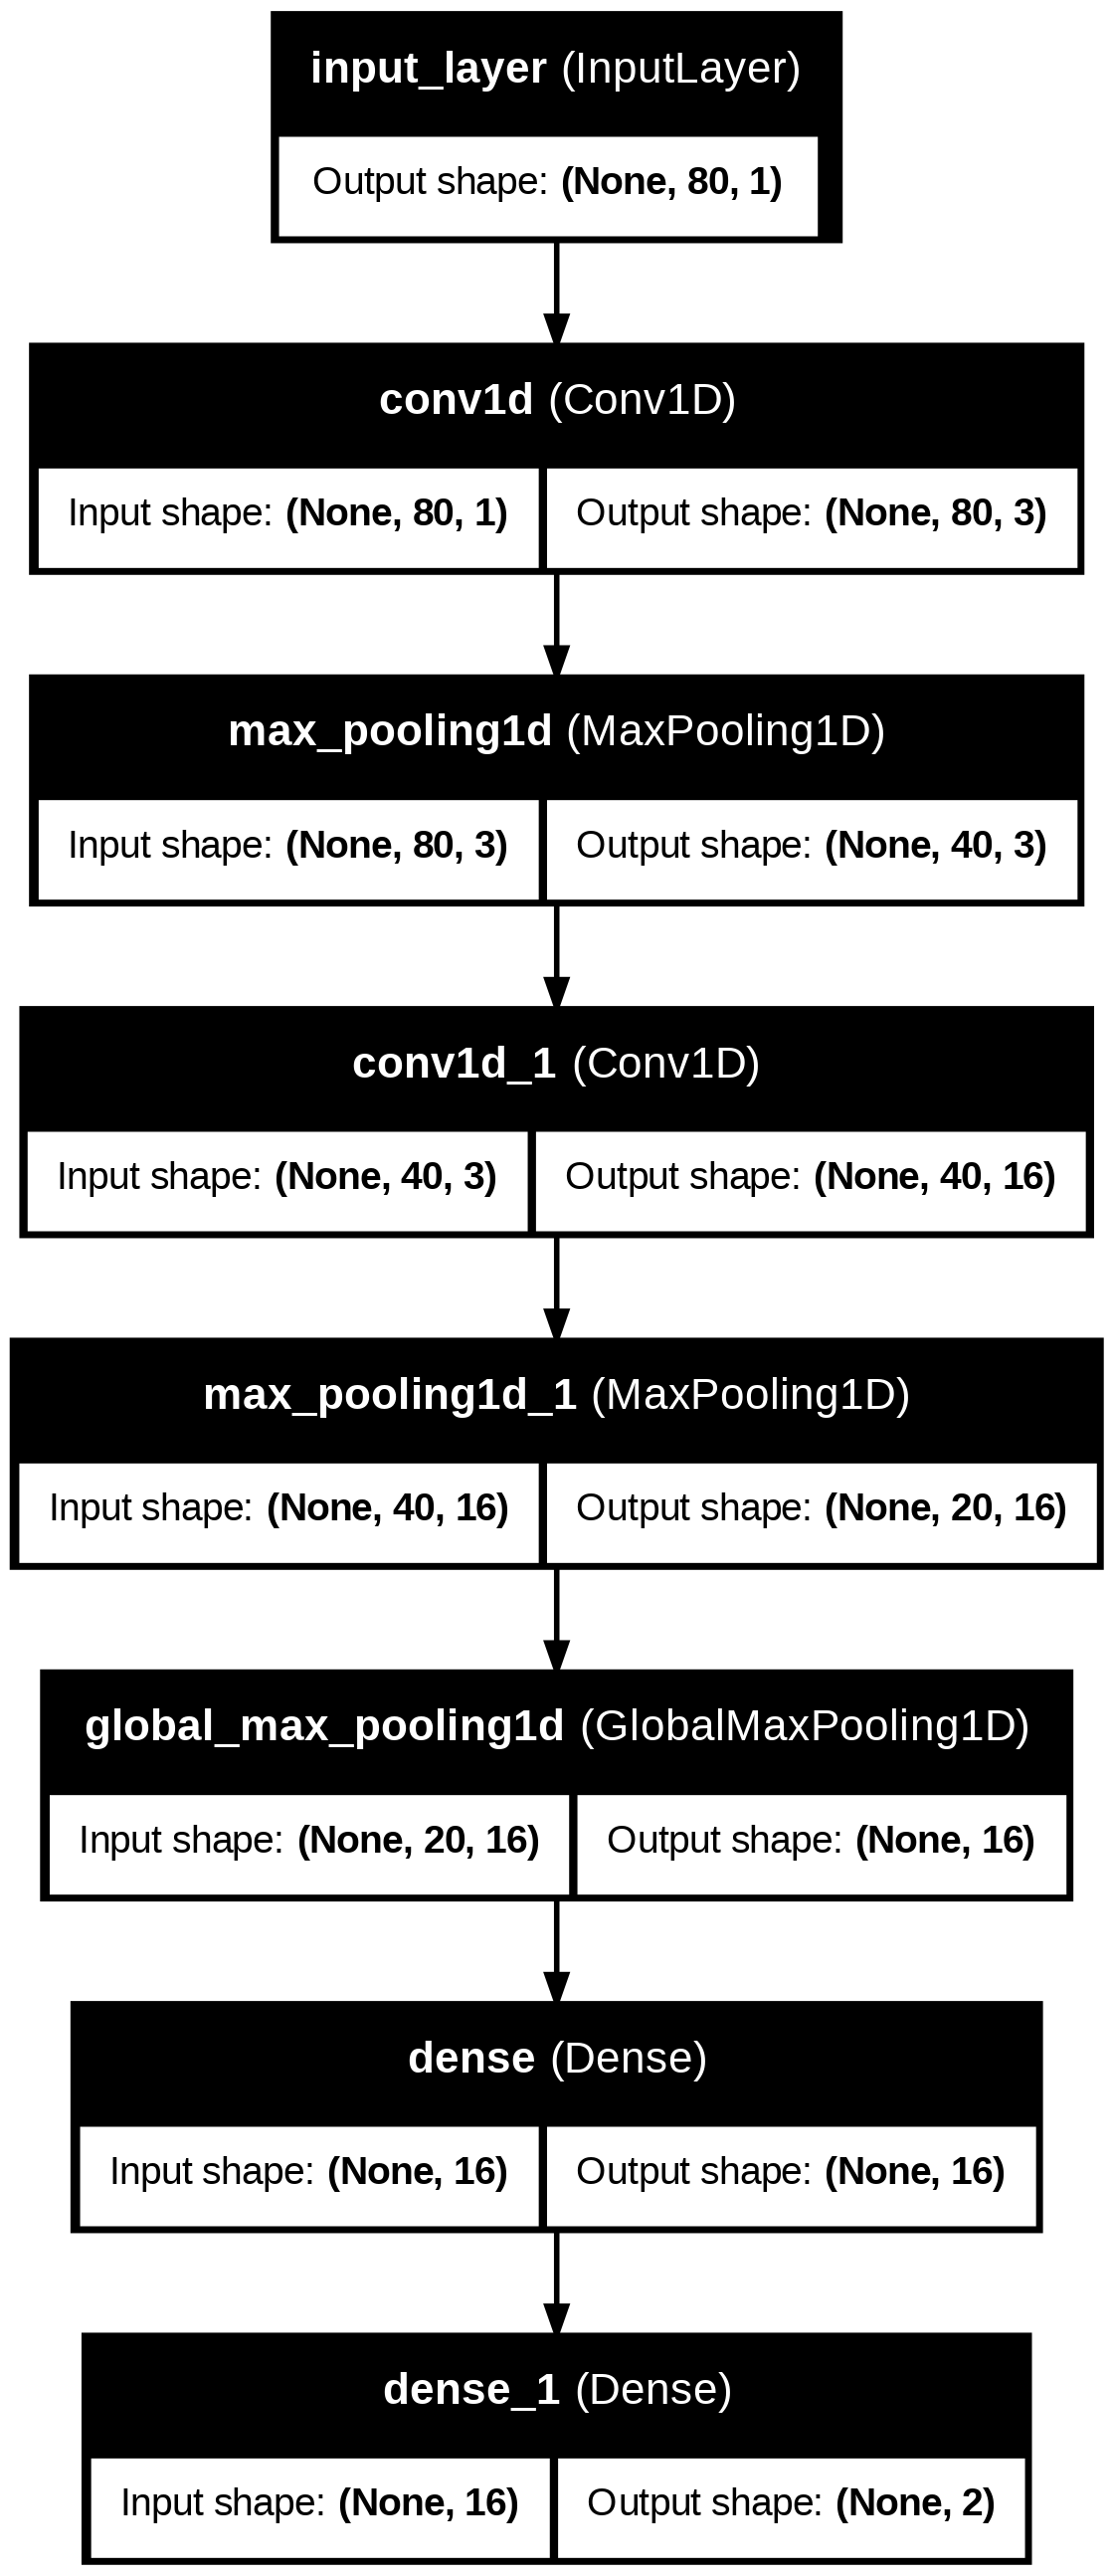

In [49]:
from keras.utils import plot_model
plot_model(model_cnn, show_shapes=True, show_layer_names=True)

In [50]:
early_stop = EarlyStopping(monitor = 'val_accuracy', mode ='max',
                          patience = 10, restore_best_weights = True)

history = model_cnn.fit(X_train_features, y_train, epochs = 200,
                       callbacks = [early_stop],
                       batch_size = 64, validation_data = (X_test_features, y_test))

Epoch 1/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 66ms/step - acc: 0.4768 - loss: 4.8745 - val_acc: 0.5000 - val_loss: 2.5087
Epoch 2/200


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_accuracy` which is not available. Available metrics are: acc,loss,val_acc,val_loss
  current = self.get_monitor_value(logs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.4635 - loss: 2.2136 - val_acc: 0.6375 - val_loss: 1.0331
Epoch 3/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - acc: 0.8237 - loss: 0.7865 - val_acc: 0.7125 - val_loss: 0.5994
Epoch 4/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - acc: 0.8604 - loss: 0.3594 - val_acc: 0.8500 - val_loss: 0.4256
Epoch 5/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - acc: 0.9405 - loss: 0.2462 - val_acc: 0.9625 - val_loss: 0.2250
Epoch 6/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9794 - loss: 0.1276 - val_acc: 0.9875 - val_loss: 0.1327
Epoch 7/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9871 - loss: 0.0949 - val_acc: 1.0000 - val_loss: 0.0969
Epoch 8/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9910 - loss: 0.0739 - val_acc: 1.0000 - val_loss: 0.0830
Epoch 9/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - acc: 0.9923 - loss: 0.0679 - val_acc: 1.0000 - val_loss: 0.0729
Epoch 10/200
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - acc: 0.9871 - loss: 0.0652 - va

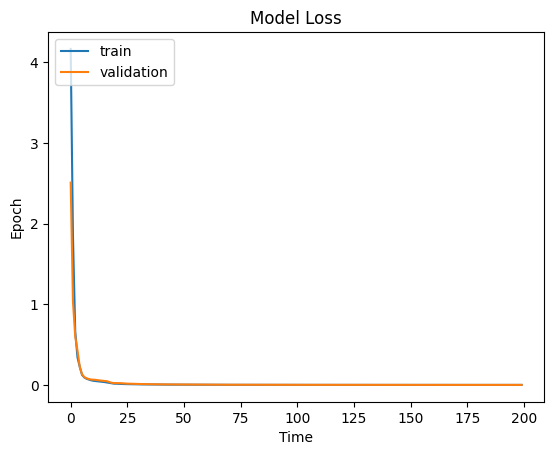

In [51]:
# Summarize History for Loss

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Time')
plt.ylabel('Epoch')
plt.legend(['train', 'validation'], loc = 'upper left')
plt.show()

In [52]:
_, acc = model_cnn.evaluate(X_test_features, y_test)
print("Test Accuracy : ", acc)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 1.0000 - loss: 4.3624e-04 
Test Accuracy :  1.0


3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 254ms/step


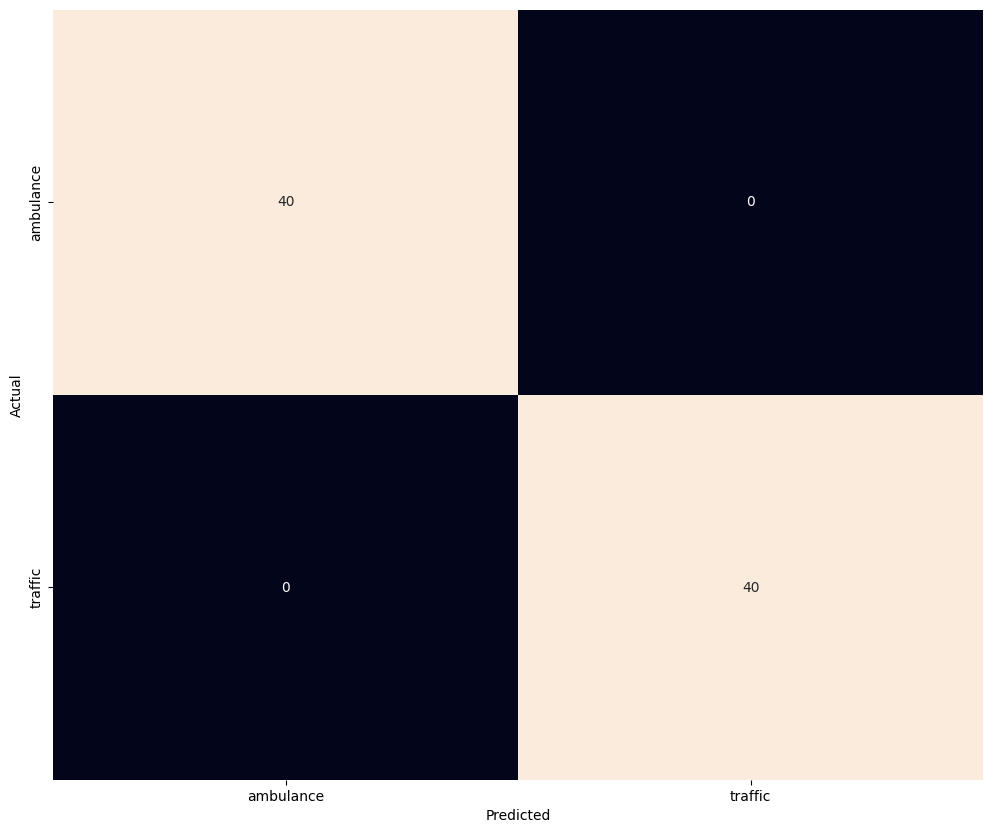

In [53]:
y_pred = model_cnn.predict(X_test_features)

conf_mat = confusion_matrix(np.argmax(y_test, axis=1), np.argmax(y_pred, axis=1))
fig, ax = plt.subplots(figsize=(12,10))
sns.heatmap(conf_mat, annot=True, fmt='d', xticklabels=labelencoder.classes_, yticklabels=labelencoder.classes_, cbar=False)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [61]:
model_cnn.save('my_model.h5')